In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row,functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import udf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["PYSPARK_PYTHON"]="/Users/lifengze/anaconda3/lib/python3.6"

# 1. Load data

In [2]:
# create SparkSession and SparkContext
conf = SparkConf().setAppName('air_delay').setMaster('local[*]')
conf.set('spark.executor.memory', '4g')
conf.set("spark.executor.cores", '2')
conf.set("spark.default.parallelism", "8")
print(conf.getAll())
spark = SparkSession.builder.config(conf=conf).getOrCreate()
sc  = spark.sparkContext
# read csv file
textFile = sc.textFile('DelayedFlights.csv')

dict_items([('spark.app.name', 'air_delay'), ('spark.master', 'local[*]'), ('spark.executor.memory', '4g'), ('spark.executor.cores', '2'), ('spark.default.parallelism', '8')])


In [3]:
# Each row of data is divided by commas
textFileRDD = textFile.map(lambda x: x.split(','))
# columns name 
header = textFileRDD.first()
# delete column name
textRDD = textFileRDD.filter(lambda r: r != header)

In [11]:
# parse data
def parse(r):
    try:
        x=Row(Id=int(r[0]),\
          Year=int(r[1]),\
          Month=int(r[2]),\
          DayofMonth=int(r[3]),\
          DayOfWeek=int(r[4]),\
          DepTime=int(float(r[5])),\
          CRSDepTime=int(r[6]),\
          ArrTime=int(float(r[7])),\
          CRSArrTime=int(r[8]), \
          UniqueCarrier=r[9],\
          FlightNum=int(r[10]),\
          TailNum=r[11],\
          ActualElapsedTime=int(float(r[12])),\
          CRSElapsedTime=int(float(r[13])),\
          AirTime=int(float(r[14])), \
          ArrDelay=int(float(r[15])),\
          DepDelay=int(float(r[16])),\
          Origin=r[17],\
          Dest=r[18], \
          Distance=int(float(r[19])),\
          TaxiIn=int(float(r[20])),\
          TaxiOut=int(float(r[21])),\
          Cancelled=int(r[22]),\
          CancellationCode=r[23],\
          Diverted=int(r[24]),\
          CarrierDelay=int(float(r[25])),\
          WeatherDelay=int(float(r[26])),\
          NASDelay= int(float(r[27])),\
          SecurityDelay=int(float(r[28])),\
          LateAircraftDelay=int(float(r[29])))
    except:
        x=None
    return x

# filter missing values
rowRDD = textRDD.map(lambda r: parse(r)).filter(lambda r:r != None)
# create DataFrame by RDD
airline_df = spark.createDataFrame(rowRDD)
pd.DataFrame(airline_df.take(10), columns=airline_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
ActualElapsedTime,90,240,121,228,123,56,57,155,147,135
AirTime,77,230,107,213,110,49,47,143,134,118
ArrDelay,34,57,80,15,16,37,19,47,64,72
ArrTime,1959,2037,1845,1640,1526,1512,1754,1657,2334,1927
CRSArrTime,1925,1940,1725,1625,1510,1435,1735,1610,2230,1815
CRSDepTime,1755,1830,1510,1425,1255,1325,1625,1255,1945,1650
CRSElapsedTime,90,250,135,240,135,70,70,195,165,145
CancellationCode,N,N,N,N,N,N,N,N,N,N
Cancelled,0,0,0,0,0,0,0,0,0,0
CarrierDelay,2,10,8,3,0,12,7,40,5,3


In [12]:
# filter cancelled flights
airline_df = airline_df.filter(airline_df.Cancelled == '0')
# redefine isArrDelay，When the delay time is greater than 0, it is considered to be set to 1, and the flight is considered to be delayed
airline_df = airline_df.withColumn('isArrDelay', F.when(airline_df.ArrDelay.cast('Int') > 0, 1).otherwise(0))

In [13]:
# time field format:hhmm->hh.for example:2055->20:55->20
def hour_ex(x): 
    h = int(str(int(x)).zfill(4)[:2])
    return h

f = udf(hour_ex, IntegerType())

# time format
airline_df = airline_df.withColumn('DepTime', f(airline_df.DepTime))
airline_df = airline_df.withColumn('CRSDepTime', f(airline_df.CRSDepTime))
airline_df = airline_df.withColumn('ArrTime', f(airline_df.ArrTime))
airline_df = airline_df.withColumn('CRSArrTime', f(airline_df.CRSArrTime))
airline_df.registerTempTable("airlineDF")

In [14]:
pd.DataFrame(airline_df.take(10), columns=airline_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
ActualElapsedTime,90,240,121,228,123,56,57,155,147,135
AirTime,77,230,107,213,110,49,47,143,134,118
ArrDelay,34,57,80,15,16,37,19,47,64,72
ArrTime,19,20,18,16,15,15,17,16,23,19
CRSArrTime,19,19,17,16,15,14,17,16,22,18
CRSDepTime,17,18,15,14,12,13,16,12,19,16
CRSElapsedTime,90,250,135,240,135,70,70,195,165,145
CancellationCode,N,N,N,N,N,N,N,N,N,N
Cancelled,0,0,0,0,0,0,0,0,0,0
CarrierDelay,2,10,8,3,0,12,7,40,5,3


# 2. Exploration of the reasons for the delay

## 2.1 The relationship between UniqueCarrier and flight delays

In [15]:
unique_carrier_delay = spark.sql("SELECT UniqueCarrier, count(*) conFlight,avg(ArrDelay) delay \
                                FROM airlineDF \
                                GROUP BY UniqueCarrier")
df_unique_carrier = unique_carrier_delay.toPandas()
# filter airlines without delays
df_unique_carrier = df_unique_carrier[df_unique_carrier['delay']>=0].reset_index(drop=True).set_index('UniqueCarrier')
df_unique_carrier.head(5)

,conFlight,delay
UniqueCarrier,,
UA,95465,69.491740
AA,132257,65.757457
NW,54744,61.308801
EV,56781,66.491362
B6,38232,78.605906


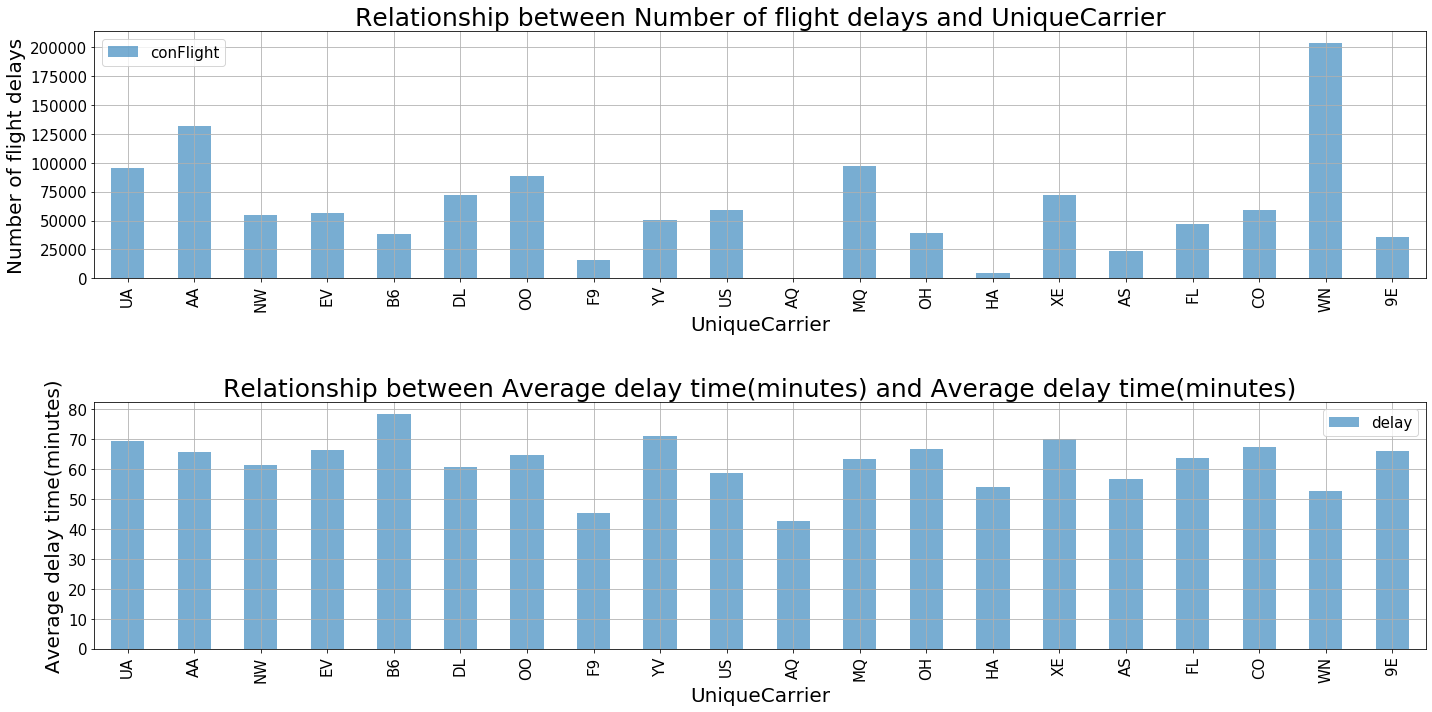

In [16]:
fig,axes = plt.subplots(2, 1, figsize=(20,10))
df_unique_carrier[['conFlight']].plot(kind='bar',ax=axes[0],use_index=True,grid=True,alpha=0.6,fontsize=15)
df_unique_carrier[['delay']].plot(kind='bar',ax=axes[1],use_index=True,grid=True,alpha=0.6,fontsize=15)

axes[0].set_title('Relationship between Number of flight delays and UniqueCarrier',fontsize=25)
axes[0].set_xlabel('UniqueCarrier',fontsize=20)
axes[0].set_ylabel('Number of flight delays',fontsize=20)
axes[0].legend(loc='best',fontsize=15)
axes[1].set_title('Relationship between Average delay time(minutes) and Average delay time(minutes)',fontsize=25)
axes[1].set_xlabel('UniqueCarrier',fontsize=20)
axes[1].set_ylabel('Average delay time(minutes)',fontsize=20)
axes[1].legend(loc='best',fontsize=15)

fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.2 The relationship between Origin and flight delays

In [17]:
groupedDelay = spark.sql("SELECT Origin, count(*) conFlight,avg(ArrDelay) delay \
                                FROM airlineDF \
                                GROUP BY Origin")
df_origin = groupedDelay.toPandas()
# Get the top 10 airports with the longest delays
df_origin =  df_origin.sort_values('delay',ascending=0)[:10].reset_index(drop=True).set_index('Origin')
df_origin.head(5)

,conFlight,delay
Origin,,
ACY,11,174.454545
CMX,26,158.692308
ALO,20,120.400000
PIR,1,118.000000
PLN,17,115.823529


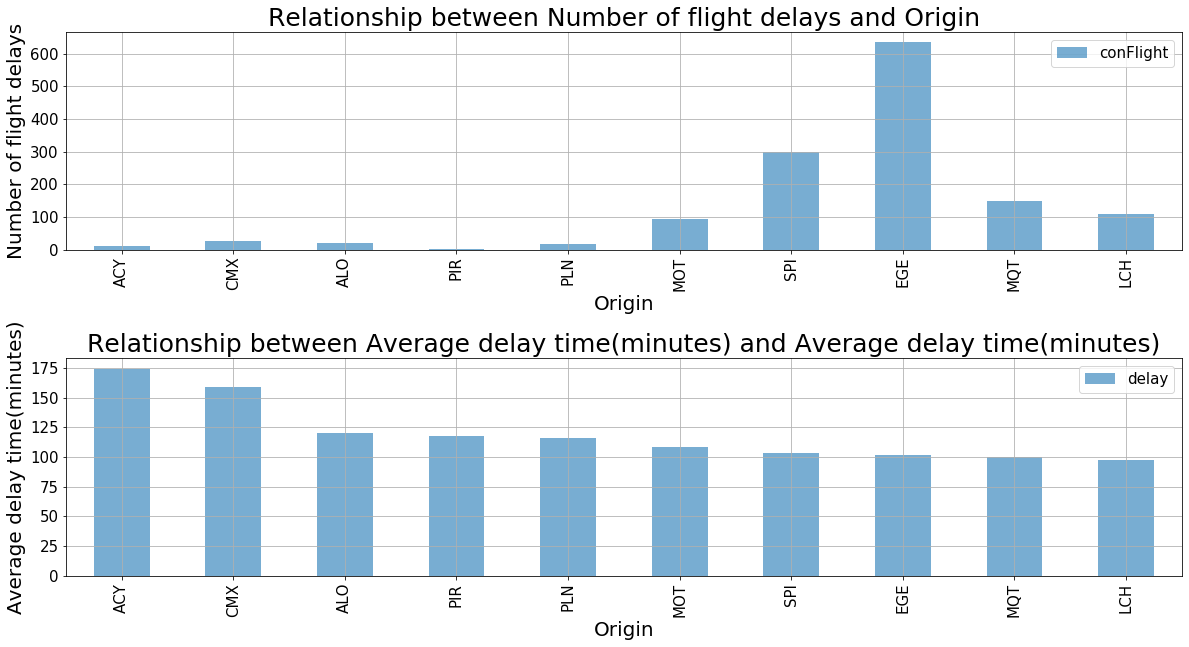

In [18]:
fig,axes = plt.subplots(2, 1, figsize=(20,10))
df_origin[['conFlight']].plot(kind='bar',ax=axes[0],use_index=True,grid=True,alpha=0.6,fontsize=15)
df_origin[['delay']].plot(kind='bar',ax=axes[1],use_index=True,grid=True,alpha=0.6,fontsize=15)

axes[0].set_title('Relationship between Number of flight delays and Origin',fontsize=25)
axes[0].set_xlabel('Origin',fontsize=20)
axes[0].set_ylabel('Number of flight delays',fontsize=20)
axes[0].legend(loc='best',fontsize=15)
axes[1].set_title('Relationship between Average delay time(minutes) and Average delay time(minutes)',fontsize=25)
axes[1].set_xlabel('Origin',fontsize=20)
axes[1].set_ylabel('Average delay time(minutes)',fontsize=20)
axes[1].legend(loc='best',fontsize=15)

plt.subplots_adjust(hspace=0.5)
plt.show()

##  2.3 The relationship between Distance and flight delays

In [19]:
# Filter flights without delay
dis_delay = airline_df.select(['Distance','ArrDelay']).filter('ArrDelay>0')
df_dis_delay = dis_delay.toPandas()
df_dis_delay.head(5)

,Distance,ArrDelay
0,515,34
1,1591,57
2,828,80
3,1489,15
4,838,16


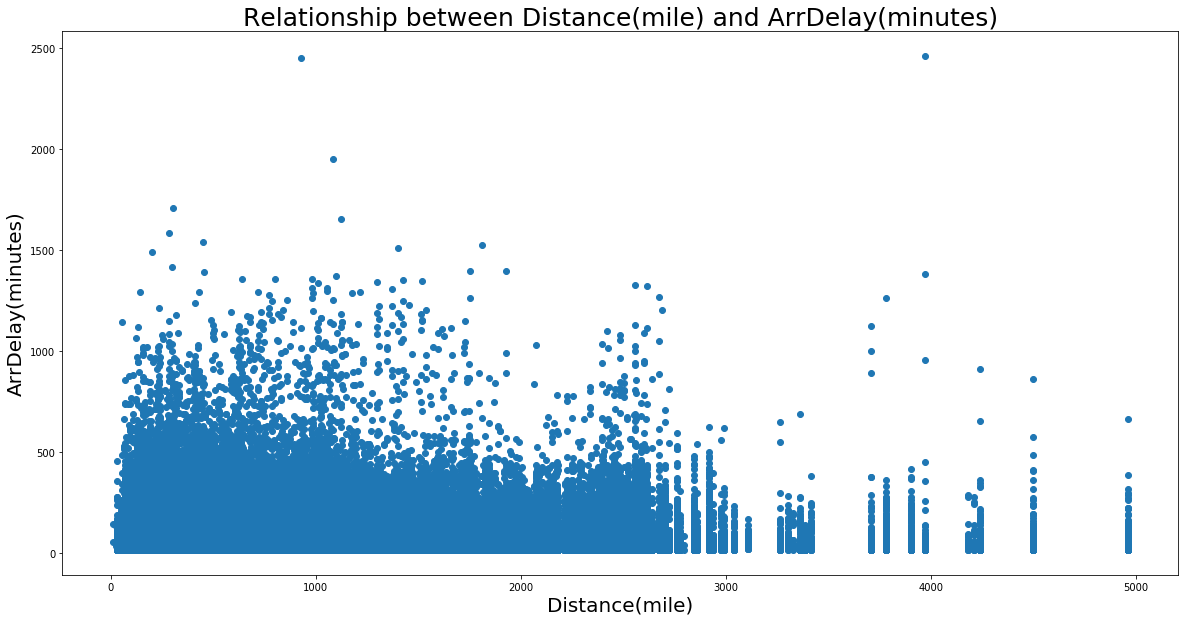

In [20]:
fig,ax = plt.subplots(1, 1, figsize=(20,10))
plt.scatter(x=df_dis_delay['Distance'].values,y=df_dis_delay['ArrDelay'].values)

ax.set_title('Relationship between Distance(mile) and ArrDelay(minutes)',fontsize=25)
ax.set_xlabel('Distance(mile)',fontsize=20)
ax.set_ylabel('ArrDelay(minutes)',fontsize=20)

plt.show()

In [21]:
np.corrcoef(df_dis_delay['Distance'].values,df_dis_delay['ArrDelay'].values)

array([[1.        , 0.01495681],
       [0.01495681, 1.        ]])

## 2.4 The relationship between taxiout and flight delays

In [22]:
taxiout_delay = airline_df.select(['TaxiOut','ArrDelay']).filter('ArrDelay>0')
taxiout_delay = taxiout_delay.toPandas()
taxiout_delay.head(5)

,TaxiOut,ArrDelay
0,10,34
1,7,57
2,8,80
3,8,15
4,9,16


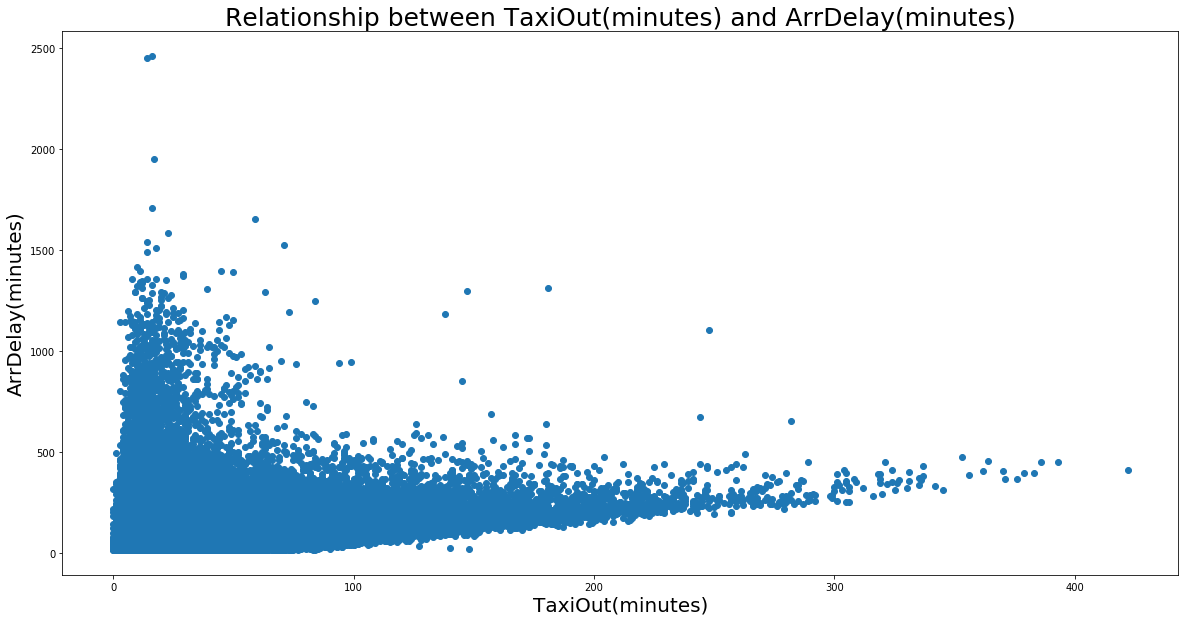

In [23]:
fig,ax = plt.subplots(1, 1, figsize=(20,10))
plt.scatter(x=taxiout_delay['TaxiOut'].values,y=taxiout_delay['ArrDelay'].values)

ax.set_title('Relationship between TaxiOut(minutes) and ArrDelay(minutes)',fontsize=25)
ax.set_xlabel('TaxiOut(minutes)',fontsize=20)
ax.set_ylabel('ArrDelay(minutes)',fontsize=20)

plt.show()

In [24]:
np.corrcoef(taxiout_delay['TaxiOut'].values,taxiout_delay['ArrDelay'].values)

array([[1.        , 0.20844325],
       [0.20844325, 1.        ]])

## 2.5 Explore the main reasons for flight delays from CancellationCode

In [25]:
cause_delay = spark.sql("SELECT sum(WeatherDelay) Weather,sum(NASDelay) NAS,sum(SecurityDelay) Security,sum(LateAircraftDelay) lateAircraft,sum(CarrierDelay) Carrier\
                              FROM airlineDF ")
df_cause_delay = cause_delay.toPandas()
df_cause_delay.head()

,Weather,NAS,Security,lateAircraft,Carrier
0,4620160,18739310,112445,31557038,23926070


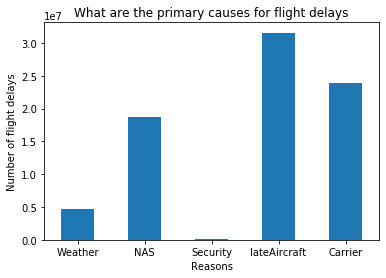

In [26]:
series = pd.Series(df_cause_delay.values[0], index=['Weather', 'NAS', 'Security', 'lateAircraft','Carrier'], name='series')
series.plot(kind='bar',rot=0)

plt.xlabel(u"Reasons")
plt.ylabel(u"Number of flight delays") 
plt.title(u"What are the primary causes for flight delays")
plt.show()

## 2.6 Take an airport as an example to observe its delays

In [27]:
# Take sjc airport as an example
Origin_Airport="SJC"
df_ORG = spark.sql("SELECT * from airlineDF WHERE origin='"+ Origin_Airport+"'")
df_ORG.registerTempTable("df_ORG")
df_ORG.select('ArrTime','CRSArrTime','CRSDepTime',\
              'DayOfWeek','DayofMonth','ArrDelay', 'Dest').show(2)

+-------+----------+----------+---------+----------+--------+----+
|ArrTime|CRSArrTime|CRSDepTime|DayOfWeek|DayofMonth|ArrDelay|Dest|
+-------+----------+----------+---------+----------+--------+----+
|     22|        21|        20|        4|         3|      58| BUR|
|     18|        18|        17|        4|         3|      15| BUR|
+-------+----------+----------+---------+----------+--------+----+
only showing top 2 rows



In [28]:
print("Number of flights at this airport: " + str(df_ORG.count()))
grp_carr = spark.sql("SELECT  UniqueCarrier,month, avg(ArrDelay) avgDelay from df_ORG \
                            WHERE isArrDelay==1 \
                            GROUP BY UniqueCarrier,month")
s = grp_carr.toPandas()

Number of flights at this airport: 7224


Text(0.5, 1.0, 'How much delay does each carrier has in each month?')

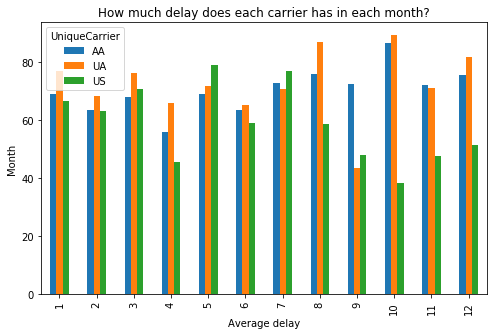

In [29]:
from pylab import rcParams

ps = s.pivot(index='month', columns='UniqueCarrier', values='avgDelay')[['AA','UA','US']]
rcParams['figure.figsize'] = (8,5)
ps.plot(kind='bar')
plt.xlabel('Average delay')
plt.ylabel('Month')
plt.title('How much delay does each carrier has in each month?')

## 2.7 The relationship between delay and time and week of an airport

In [30]:
hour_grouped = df_ORG.filter(df_ORG['isArrDelay']==1).select('DayOfWeek','CRSDepTime','ArrDelay').groupby('DayOfWeek','CRSDepTime').mean('ArrDelay')

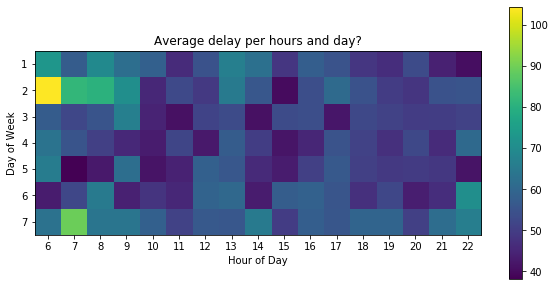

In [31]:
rcParams['figure.figsize'] = (10,5)
dh = hour_grouped.toPandas()
c = dh.pivot('DayOfWeek','CRSDepTime')
X = c.columns.levels[1].values
Y = c.index.values
Z = c.values
plt.xticks(range(0,24), X)
plt.yticks(range(0,7), Y)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Average delay per hours and day?')
plt.imshow(Z)
plt.colorbar()